#### **1. Dataset Preview and Statistical Chek:**

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Adding path to Python to use my own function library
import sys
sys.path.append('/content/drive/MyDrive/MachineLearning_2025_Kairu')

In [ ]:
# To see if library folder can be seen on the path :
# It is usefull especially if you modify the code in library

!ls /content/drive/MyDrive/MachineLearning_2025_Kairu
!ls /content/drive/MyDrive/MachineLearning_2025_Kairu/Libres

HausePriceDataModels_MuratCagriOzkan_25032025.ipynb
Libres
penguinsDatasetEDA_13032025_MuratCagriOzkan.ipynb
eda_lib.py  __init__.py  __pycache__


In [ ]:
import pandas as pd


# Loading dataset..:

df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

**FEATURES :**                                                                                    


**1.** **longitude :** The geographical coordinate that specifies the east-west position of a neighborhood (block group). It helps locate the area on the map.

**2.** **latitude :** The geographical coordinate that specifies the north-south position of a neighborhood. Together with longitude, it pinpoints the location.

**3.** **housing_median_age :** The median age of the houses in the neighborhood. This represents the middle value of the house ages, indicating how old or new the houses are.

**4.** **total_rooms :** The total number of rooms in all the houses within the neighborhood. This gives an overall idea of the housing density in the area.

**5.** **total_bedrooms :** The total number of bedrooms in all the houses in the neighborhood. This feature is used along with total rooms to analyze living space and occupancy.

**6.** **population :** The total number of people residing in the neighborhood. This helps in understanding the population density and overall occupancy.

**7.** **households :** The total number of households in the neighborhood. A household is typically defined as a family or a group of people living together, which can be used to gauge the average household size.

**8.** **median_income :** The median income of the households in the neighborhood, typically measured in tens of thousands of dollars. This feature is often used as an indicator of the area's economic status.

**9.** **median_house_value :** The median value of the houses in the neighborhood, which reflects the typical market value of the homes. This is the target variable in many housing price prediction models.

**10.** **ocean_proximity :** A categorical variable that describes the proximity of the neighborhood to the ocean. The values can include categories such as "NEAR BAY", "<1H OCEAN", "INLAND", "NEAR OCEAN", and "ISLAND", indicating the area's relative distance from the coast and potentially influencing house prices.

In [ ]:
# Dataset preview
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# To determinethe number of rows and features in the dataset..
print(f"Numer of rows..: {df.shape[0]}")
print(f"Numer of features..: {df.shape[1]}")

Numer of rows..: 20640
Numer of features..: 10


In [ ]:
# Verifying whether all data types are appropriate.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


**longitude** is a geographic data thats why we can ecarte this feature for the main statistics

#### **2. Missing Data Detection and Solution :**

In [ ]:
# total_bedrooms column has 207 missing values

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Calculate the percentage of missing values in the total_bedrooms column

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values %' : round(missing_percentage,4)})
missing_data.loc['total_bedrooms']

,total_bedrooms
Missing Values %,1.0029


As we can see above, the missing value percentage is 1.0029%, which suggests that dropping these values is acceptable. Alternatively, we could impute the missing values with the median, which under normally distributed circumstances would yield results same with the mean.

In [ ]:
# filling the missing data with median.

df['total_bedrooms'].fillna(value=df['total_bedrooms'].median(), inplace=True)

<ipython-input-12-d9b7bcf46afb>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(value=df['total_bedrooms'].median(), inplace=True)


In [ ]:
# Checking if we have successfully imputed the median values into the data

df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


#### **3. Transforming Categoric values to Numeric values :**

In [ ]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
# Numbers are assigned based on proximity to the bay, so houses closer to the bay are more valuable than those located inland.
# there's a natural order in the categories - (Ordinal Encoding)
map_nums = {'NEAR BAY': 1,'NEAR OCEAN': 2, 'ISLAND': 3, '<1H OCEAN': 4, 'INLAND': 5}
df['ocean_proximity_num'] = list(map(lambda x: map_nums.get(x,5), df['ocean_proximity']))

# But additionally, nowadays, due to natural disasters, insurance companies are often hesitant or
# even refuse to insure houses near the bays or on islands that are more vulnerable to such events.
# That's why we could assign the numbers based on this perspective.
# For instance :

  # map_nums = {'INLAND': 1,'<1H OCEAN': 2,'NEAR BAY': 3,'NEAR OCEAN': 4,'ISLAND': 5}

# However, we will ignore this perspective for now because we need further information on this matter.

In [ ]:
df['ocean_proximity_num'].unique()

array([1, 4, 5, 2, 3])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_num
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


#### **4. Treshhold Detection and Solution:**

In [ ]:
# Importing main libraries :

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Libres is the library which I created on Drive.
# It includes : outlier_detecterminator function

from Libres import outlier_detecterminator

In [ ]:
# I kept them here to use
#features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

Lower Bound of population  =  -620.0
Upper Bound of population  =  3132.0
Lower bound count of population..: 0
Upper bound count of population..: 1198



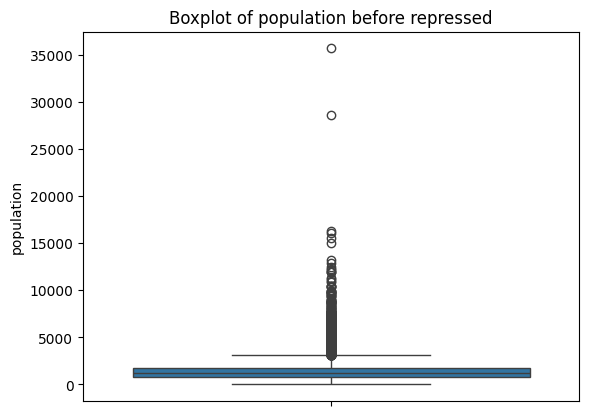


Lower bound count of population..: 0
Upper bound count of population..: 0



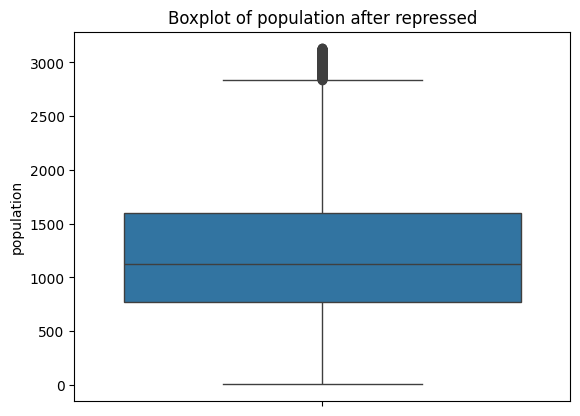

In [ ]:
# Outlier detetion and repression - population

outlier_detecterminator(df, 'population')

**Before Trimming :**
- the most highest values of outliers 30000 and 35000 can be seen clearly.
- outlier values are distributed between 2800 and 17000

**After Trimming :**
- median : about 1100
- lower and upper bounds are between 0 and 2800
- the data is more centrally distributed after trimming outliers.


Lower Bound of total_rooms  =  -867.0
Upper Bound of total_rooms  =  5203.0
Lower bound count of total_rooms..: 0
Upper bound count of total_rooms..: 704



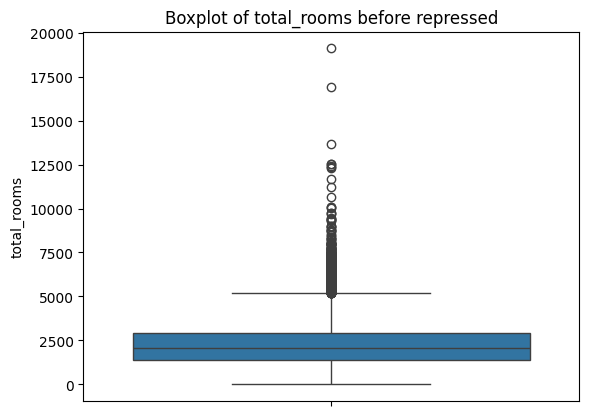


Lower bound count of total_rooms..: 0
Upper bound count of total_rooms..: 0



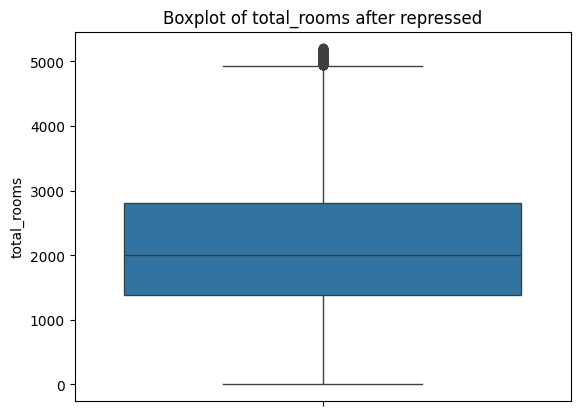

In [ ]:
# Outlier detetion and repression - total_rooms

outlier_detecterminator(df, 'total_rooms')

**Before Trimming :**
- the most highest values of outliers 17500 and 20000
- outlier values are distributed between 5000 and 15000

**After Trimming :**
- median : about 2000
- lower and upper bounds are between 0 and 5000
- the data is more centrally distributed after trimming outliers.


Lower Bound of total_bedrooms  =  -144.0
Upper Bound of total_bedrooms  =  1000.0
Lower bound count of total_bedrooms..: 0
Upper bound count of total_bedrooms..: 427



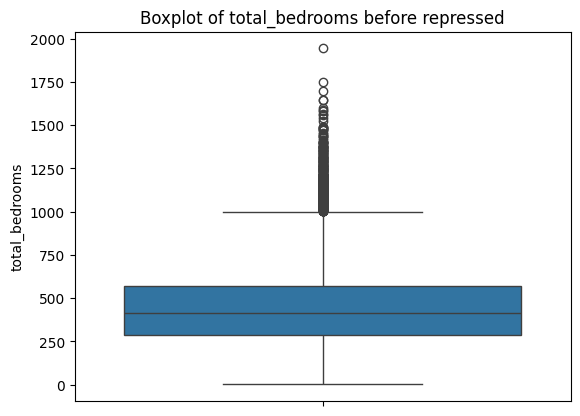


Lower bound count of total_bedrooms..: 0
Upper bound count of total_bedrooms..: 0



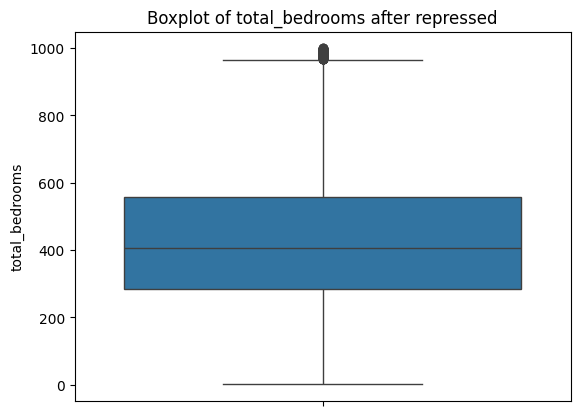

In [ ]:
# Outlier detetion and repression - total_bedrooms
outlier_detecterminator(df, 'total_bedrooms')

**Before Trimming :**
- the most highest values of outliers 1750 and 2000
- outlier values are distributed between 1000 and 1.750

**After Trimming :**
- median : about 400
- lower and upper bounds are between 0 and 5.000
- feature values are distributed between 200 and 600
- the data is more centrally distributed after trimming outliers.

Lower Bound of population  =  -390.25
Upper Bound of population  =  2639.75
Lower bound count of population..: 0
Upper bound count of population..: 302



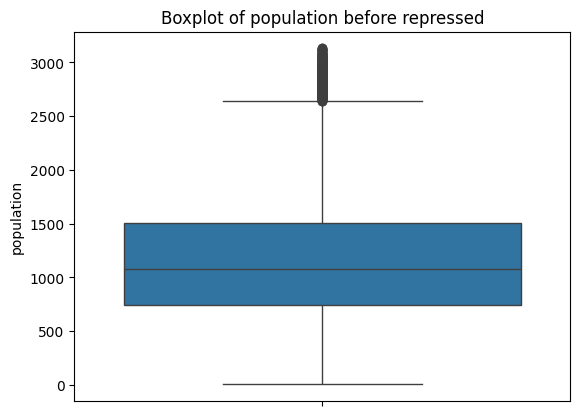


Lower bound count of population..: 0
Upper bound count of population..: 0



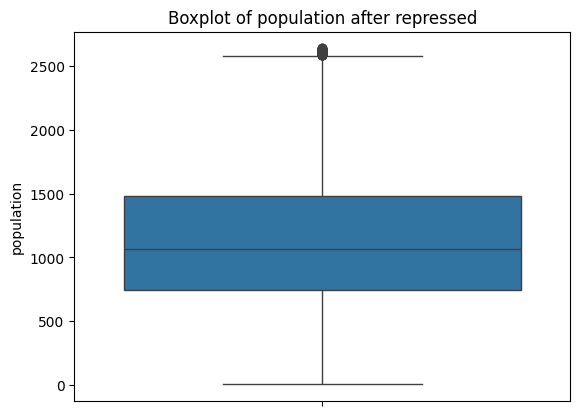

In [ ]:
# Outlier detetion and repression - population

outlier_detecterminator(df, 'population')

**Before Trimming :**
- the highest values of outliers 3000
- outlier values are distributed between 2500 and 3000

**After Trimming :**
- median : about 1000
- lower and upper bounds are between 0 and 2500
- feature values are distributed between 500 and 1500
- the data is more centrally distributed after trimming outliers.

Lower Bound of households  =  -110.0
Upper Bound of households  =  890.0
Lower bound count of households..: 0
Upper bound count of households..: 99



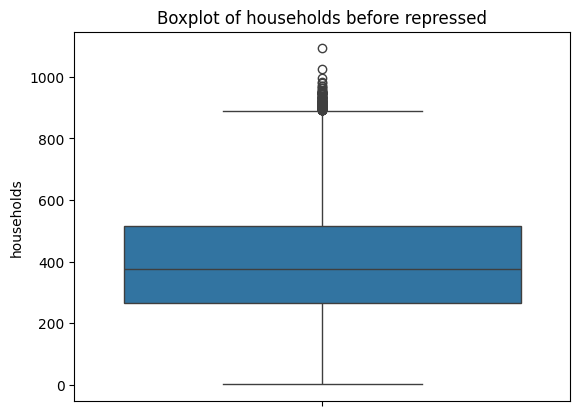


Lower bound count of households..: 0
Upper bound count of households..: 0



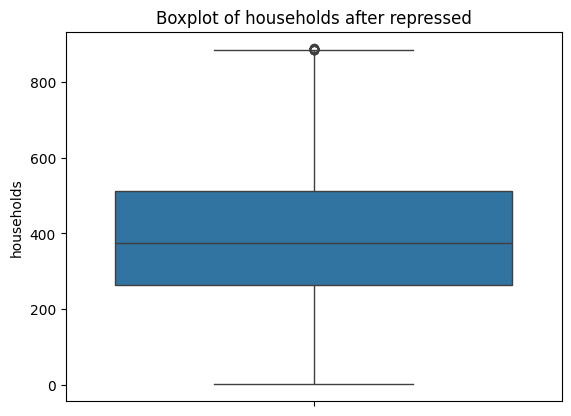

In [ ]:
# Outlier detetion and repression - households
outlier_detecterminator(df, 'households')

**Before Trimming :**
- the highest values of outliers about 1300
- outlier values are distributed between 250 and 450

**After Trimming :**
- median : about 1000
- lower and upper bounds are approximately between 0 and 800
- feature values are  approximately distributed between 300 and 500
- the data is more centrally distributed after trimming outliers.

Lower Bound of median_income  =  -0.732
Upper Bound of median_income  =  7.998
Lower bound count of median_income..: 0
Upper bound count of median_income..: 591



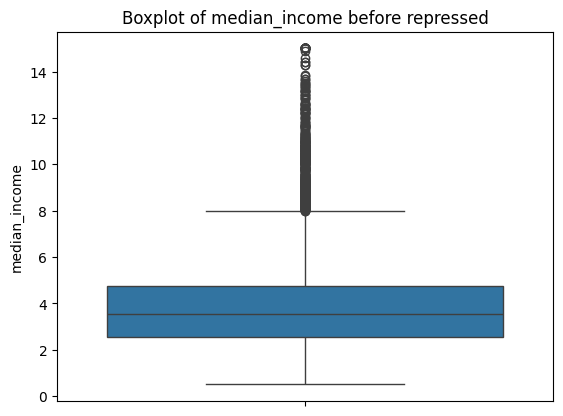


Lower bound count of median_income..: 0
Upper bound count of median_income..: 0



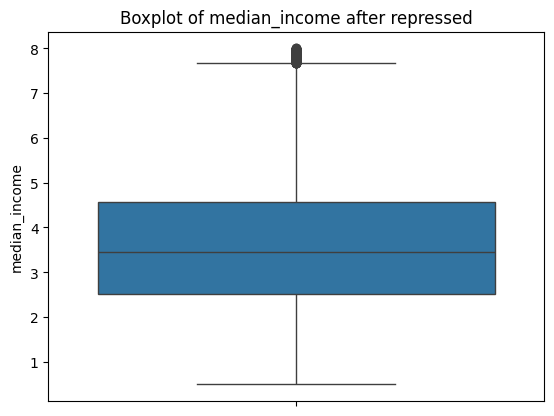

In [ ]:
# Outlier detetion and repression - median_income

outlier_detecterminator(df, 'median_income')

**Before Trimming :**
- the highest values of outliers approximately between 14 and 15
- outlier values are distributed approximately between 8 and 15

**After Trimming :**
- median : approximately 5
- lower and upper bounds are approximately between -1 and 8
- feature values are  approximately distributed between 2.5 and 4.5
- the data is more centrally distributed after trimming outliers.

Lower Bound of median_house_value  =  -91875.0
Upper Bound of median_house_value  =  456325.0
Lower bound count of median_house_value..: 0
Upper bound count of median_house_value..: 635



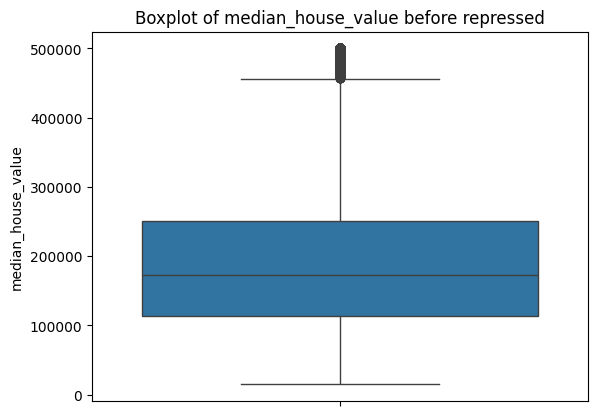


Lower bound count of median_house_value..: 0
Upper bound count of median_house_value..: 0



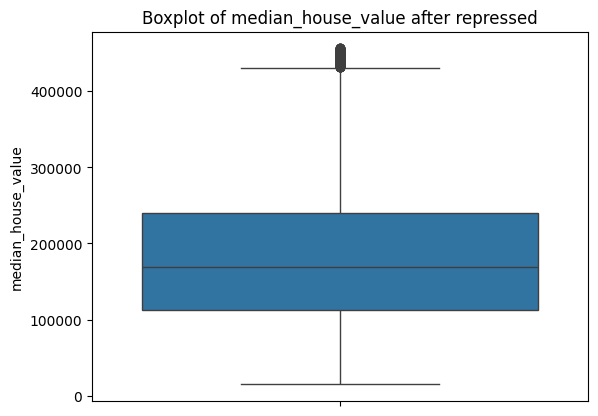

In [ ]:
# Outlier detetion and repression - median_house_value

outlier_detecterminator(df, 'median_house_value')

**Before Trimming :**
- the highest values of outliers approximately 500000
- outlier values are distributed approximately between 450000 and 500000

**After Trimming :**
- median : approximately 180000
- lower and upper bounds are approximately between 0 and 450000
- feature values are  approximately distributed between 100000 and 250000
- the data is more centrally distributed after trimming outliers.

#### **5. Feature Engineering:**

In [ ]:
# I thought about how I could use the longitude and latitude features in this case, and I used ChatGPT to understand and create a new feature.
# that whole part is taken from ChapGPT

# Define the Haversine distance function

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance (in kilometers) between two points
    on the Earth specified in decimal degrees using the Haversine formula.
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Compute differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Calculate the center of the dataset (mean latitude and longitude)
center_lat = df['latitude'].mean()
center_lon = df['longitude'].mean()

# Create a new feature: distance from the center of the dataset
df['distance_from_center_km'] = haversine_distance(df['latitude'], df['longitude'], center_lat, center_lon)

# Display the first few rows to check the new feature
print(df[['latitude', 'longitude', 'distance_from_center_km']].head())


   latitude  longitude  distance_from_center_km
2     37.85    -122.24               333.221124
3     37.85    -122.25               333.846585
4     37.85    -122.25               333.846585
5     37.85    -122.25               333.846585
6     37.84    -122.25               333.067914


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_num,distance_from_center_km
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,333.221124
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,333.846585
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,333.846585
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,1,333.846585
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,1,333.067914


In [ ]:
sns.corr(df)

AttributeError: module 'seaborn' has no attribute 'corr'

Text(0.5, 1.0, 'House Values depends on Distance')

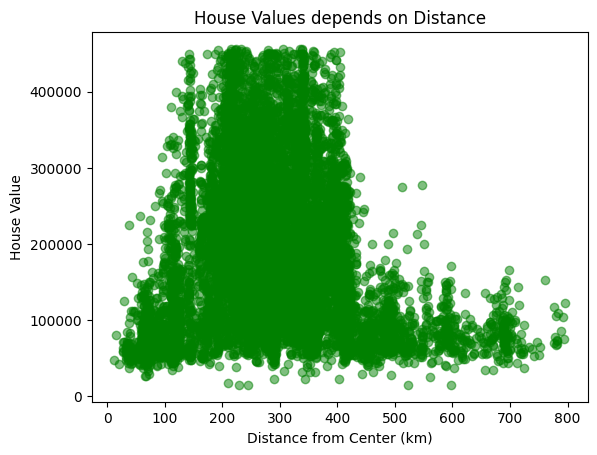

In [ ]:
plt.scatter(x = df['distance_from_center_km'], y = df['median_house_value'], color= 'green', alpha = 0.5)
plt.xlabel('Distance from Center (km)')
plt.ylabel('House Value')
plt.title('House Values depends on Distance')

- the difference between bay and city center is not clearly be seen on this
-It does not directly differentiate between bay-side houses and city-center houses.

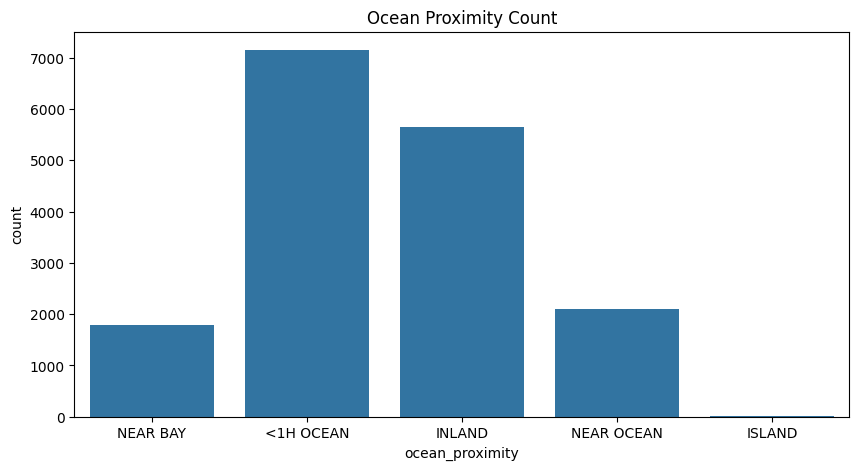

In [ ]:
# countplot shows the frequency of each category directly.
plt.figure(figsize=(10, 5))
sns.countplot(x='ocean_proximity', data=df)
plt.title("Ocean Proximity Count")
plt.show()


- It can be stated from the plot that:
  - ISLAND is underpresented.
  - <1H OCEAN  dominates the dataset. That might cause bias problem. And the model may become overly tuned to patterns in that dominant group, making predictions for the less-represented categories less reliable.
  - For this purpose, additional feature engineering may be needed.

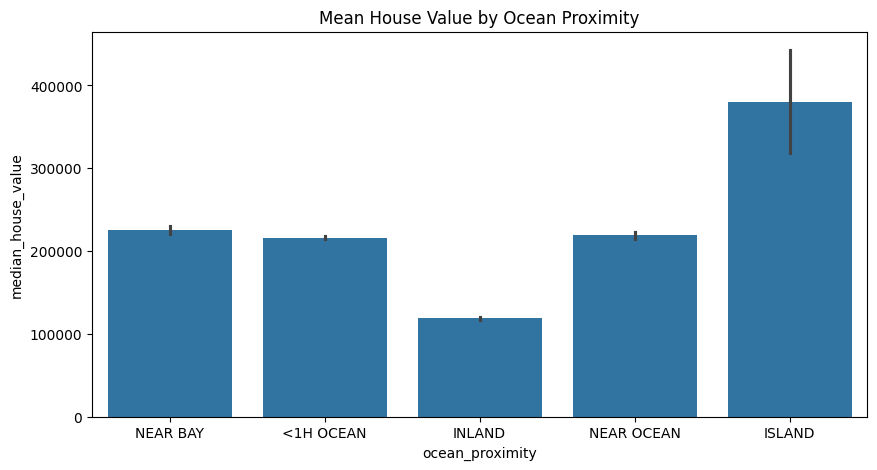

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='ocean_proximity', y='median_house_value', data=df)
plt.title("Mean House Value by Ocean Proximity")
plt.show()


- The highest mean value belongs to the ISLAND: if we evaluate countPlot and barPlot together can be understood that:
  - **ISLAND** has the fewest observations on the count plot, yet it shows the highest average house value on the bar plot. This suggests that the average is based on limited data and may not fully represent the overall trend."
  - **INLAND** have the lowest mean house value, suggesting that properties farther from the ocean tend to be less expensive on average.
  - **NEAR BAY, <1H OCEAN, NEAR OCEAN** They are relatively close to the ocean and have moderately high house values compared to INLAND.

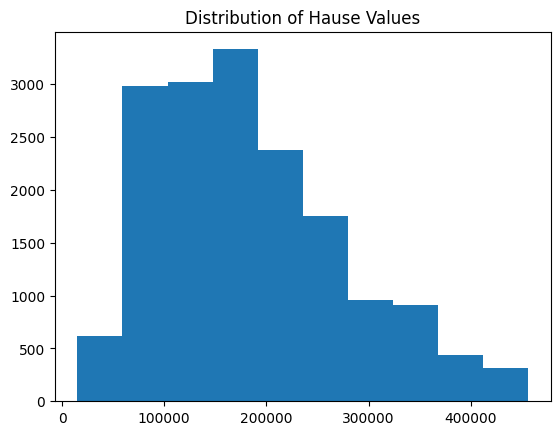

In [ ]:
plt.hist(x = 'median_house_value',data = df)
plt.title('Distribution of Hause Values')
plt.show()

According to the histogram, it can be stated that:
- The distribution of the House Value seems close to the normal distribution.
- It does not appear heavily skewed

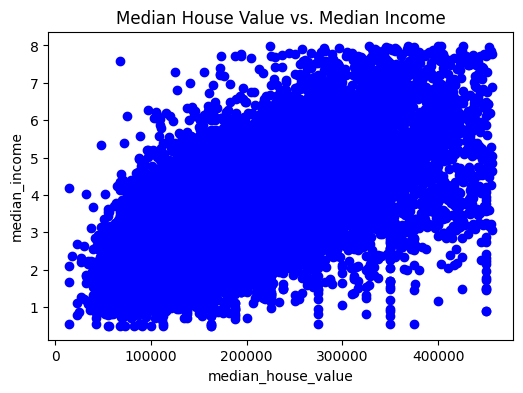

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df['median_house_value'], df['median_income'], color = 'blue')
plt.xlabel("median_house_value")
plt.ylabel("median_income")
plt.title("Median House Value vs. Median Income")
plt.show()

It can be stated from the plot that:
- As median income increases, median house value also tends to increase, indicating a positive relationship between the two variables. That means positive correlation.
- The data points are not tightly clustered along a single line; they spread out - income and house values generally rise together.
- There are some cases where low income is paired with a high house value, which could point to outliers or anomalies—possibly due to data entry errors.

#### **6. STANDARDIZATION**

In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_num',
       'distance_from_center_km'],
      dtype='object')

In [ ]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num','distance_from_center_km']

In [ ]:
X = df[features] # I prefer to scale the feature I created, ocean_proximity_num, because the model is sensitive to feature scales.

y = df['median_house_value']

In [ ]:
# Imported train_test_split to split the dataset into training and testing sets (X_train, X_test, y_train, y_test).

from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# StandardScaler Kullanımı
from sklearn.preprocessing import StandardScaler

In [ ]:
# We scaled X_train and X_test separately to prevent data leakage.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

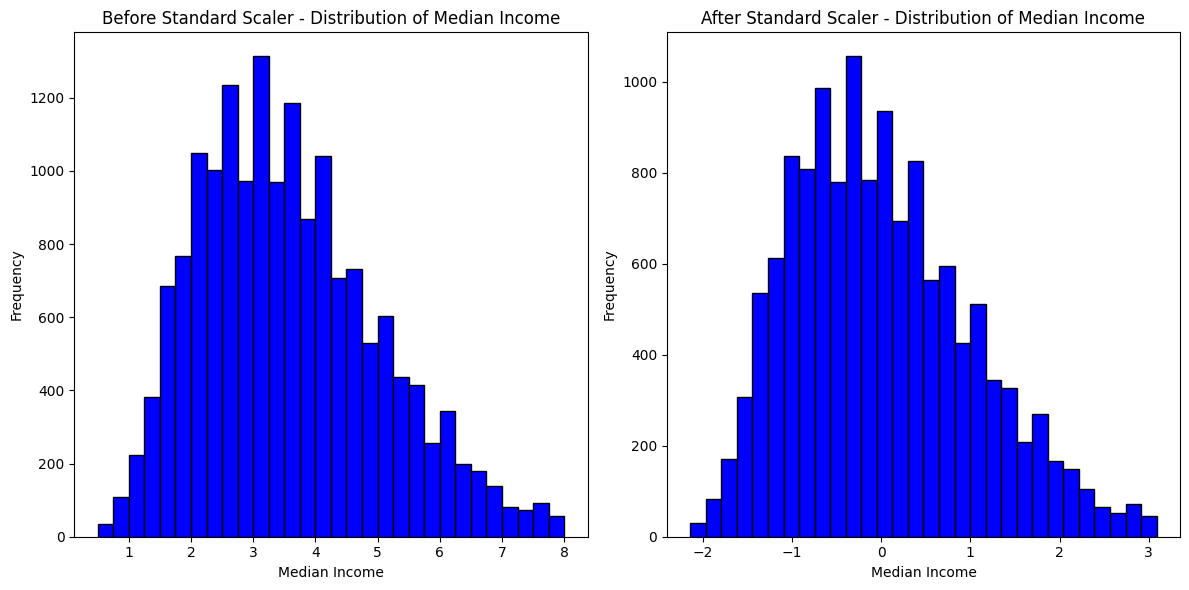

In [ ]:
# To select the 'median_income' column from the scaled data, we create a new DataFrame called x_income using iloc[].
x_income = pd.DataFrame(X_scaled).iloc[:, 7]


fig = plt.figure(figsize = (12,6))
gs = fig.add_gridspec(1, 2)


# Before Standard Scaler - Distribution of Median Income

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['median_income'], bins=30, color='blue', edgecolor='black')
ax1.set_title('Before Standard Scaler - Distribution of Median Income')
ax1.set_xlabel('Median Income')
ax1.set_ylabel('Frequency')


# After Standard Scaler - Distribution of Median Income

ax2 = fig.add_subplot(gs[0, 1])
ax2.hist(x_income, bins=30, color='blue', edgecolor='black')
ax2.set_title('After Standard Scaler - Distribution of Median Income')
ax2.set_xlabel('Median Income')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


- When comparing the two histograms, there’s no obvious difference in shape. That’s because standard scaling doesn’t alter the underlying distribution
- while the before standard scalar histogram (left sideone) shows original data values, on the other side (right side one) shows us scaled values between minimum -2 and maximum 3.